# 信用卡盜刷預測

(類別)bacno    歸戶帳號<br>
(流水號)txkey    交易序號<br>
(0~90天)locdt    授權日期<br>
(轉時間)loctm    授權時間<br>
(類別)cano 交易卡號<br>
(類別)contp 交易類別<br>
(類別)etymd 交易型態<br>
(類別)mchno 特店代號<br>
(類別)acqic 收單行代碼<br>
(類別)mcc MCC_CODE<br>
(數值)conam 交易金額-台幣(經過轉換)<br>
(bool)ecfg 網路交易註記<br>
(bool)insfg 分期交易註記<br>
(數值)iterm 分期期數<br>
(類別)stocn 消費地國別<br>
(類別)scity 消費城市<br>
(類別)stscd 狀態碼<br>
(bool)ovrlt 超額註記碼<br>
(bool)flbmk Fallback 註記<br>
(類別)hcefg 支付形態<br>
(類別)csmcu 消費地幣別<br>
(bool)flg_3dsmk 3DS 交易註記<br>
->  fraud_ind 盜刷註記 <br>

## Load Data

In [52]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.metrics import f1_score

plt.style.use(["dark_background"])
%matplotlib inline


df_y = pd.read_csv("submission_test.csv")
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

#'acqic', 'mchno'

In [53]:
print("train : " + str(df_train.shape))
df_train.head()

train : (1521787, 23)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,...,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,...,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,...,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,...,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [54]:
print("test : " + str(df_test.shape))
df_test.head()

test : (421665, 22)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,163188,116799,513.8,5,0,N,0,N,N,...,0,102,215328.0,457,59360,N,0,102,0,592489
1,6881,163188,116799,513.8,5,0,N,0,N,N,...,0,102,222007.0,457,59360,N,0,102,0,592452
2,6881,163188,116799,513.8,5,0,N,0,N,N,...,0,100,170013.0,457,59360,N,0,102,0,590212
3,6881,163188,116799,513.8,5,0,N,0,N,N,...,0,100,165914.0,457,59360,N,0,102,0,590209
4,6881,163188,116799,513.8,5,0,N,0,N,N,...,0,102,215311.0,457,59360,N,0,102,0,592488


In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521787 entries, 0 to 1521786
Data columns (total 23 columns):
acqic        1521787 non-null int64
bacno        1521787 non-null int64
cano         1521787 non-null int64
conam        1521787 non-null float64
contp        1521787 non-null int64
csmcu        1521787 non-null int64
ecfg         1521787 non-null object
etymd        1521787 non-null int64
flbmk        1509206 non-null object
flg_3dsmk    1509206 non-null object
fraud_ind    1521787 non-null int64
hcefg        1521787 non-null int64
insfg        1521787 non-null object
iterm        1521787 non-null int64
locdt        1521787 non-null int64
loctm        1521787 non-null float64
mcc          1521787 non-null int64
mchno        1521787 non-null int64
ovrlt        1521787 non-null object
scity        1521787 non-null int64
stocn        1521787 non-null int64
stscd        1521787 non-null int64
txkey        1521787 non-null int64
dtypes: float64(2), int64(16), object(5)
memory us

In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421665 entries, 0 to 421664
Data columns (total 22 columns):
acqic        421665 non-null int64
bacno        421665 non-null int64
cano         421665 non-null int64
conam        421665 non-null float64
contp        421665 non-null int64
csmcu        421665 non-null int64
ecfg         421665 non-null object
etymd        421665 non-null int64
flbmk        417950 non-null object
flg_3dsmk    417950 non-null object
hcefg        421665 non-null int64
insfg        421665 non-null object
iterm        421665 non-null int64
locdt        421665 non-null int64
loctm        421665 non-null float64
mcc          421665 non-null int64
mchno        421665 non-null int64
ovrlt        421665 non-null object
scity        421665 non-null int64
stocn        421665 non-null int64
stscd        421665 non-null int64
txkey        421665 non-null int64
dtypes: float64(2), int64(15), object(5)
memory usage: 70.8+ MB


In [57]:
df_train.describe()

,acqic,bacno,cano,conam,contp,csmcu,etymd,fraud_ind,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey
count,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06
mean,6.008003e+03,8.209027e+04,1.089170e+05,6.547219e+02,4.829368e+00,5.383324e+01,4.149114e+00,1.337572e-02,4.749410e+00,4.962784e-02,4.532732e+01,1.463152e+05,2.978089e+02,5.589022e+04,4.755128e+03,9.565116e+01,2.485499e-02,9.711265e+05
std,1.502420e+03,4.736249e+04,6.090363e+04,4.028078e+02,6.513408e-01,2.072135e+01,2.394259e+00,1.148774e-01,1.111927e+00,3.652493e-01,2.601889e+01,5.212107e+04,7.796778e+01,3.082297e+04,1.979815e+03,1.890027e+01,2.216804e-01,5.641322e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.140300e+04,5.763500e+04,4.370600e+02,5.000000e+00,6.200000e+01,2.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,2.300000e+01,1.109310e+05,2.500000e+02,3.377400e+04,3.795000e+03,1.020000e+02,0.000000e+00,4.869475e+05
50%,6.716000e+03,8.191200e+04,1.097850e+05,5.919000e+02,5.000000e+00,6.200000e+01,4.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,4.500000e+01,1.515220e+05,2.640000e+02,5.936000e+04,5.817000e+03,1.020000e+02,0.000000e+00,9.795800e+05
75%,6.769000e+03,1.230590e+05,1.618760e+05,8.073400e+02,5.000000e+00,6.200000e+01,5.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,6.800000e+01,1.858270e+05,3.430000e+02,7.920000e+04,5.817000e+03,1.020000e+02,0.000000e+00,1.455200e+06
max,6.884000e+03,1.638840e+05,2.133340e+05,7.208770e+03,6.000000e+00,7.500000e+01,1.000000e+01,1.000000e+00,9.000000e+00,8.000000e+00,9.000000e+01,2.359590e+05,4.590000e+02,1.033070e+05,6.671000e+03,1.070000e+02,4.000000e+00,1.958239e+06


## 設定資料型別

In [58]:
classRow = ['bacno', 'cano', 'contp', 'etymd', 'mchno', 'acqic', 'mcc', 'stocn','scity', 'stscd', 'hcefg', 'csmcu']
number = ['conam', 'iterm']
flag = ['ecfg', 'insfg', 'ovrlt', 'flbmk', 'flg_3dsmk']
time = 'loctm'
target = 'fraud_ind'
print(classRow)

['bacno', 'cano', 'contp', 'etymd', 'mchno', 'acqic', 'mcc', 'stocn', 'scity', 'stscd', 'hcefg', 'csmcu']


# EDA

In [59]:
def showDataScatter(dataName, dataName2):
    # 畫出原始資料
    #plt.subplot(dect_list[i])
    ax = plt.figure(figsize=(8,4))
    plt.plot(df_train[dataName], df_train[dataName2], '.')
    plt.title(dataName)
    plt.xlabel(dataName)
    plt.ylabel(dataName2)
    plt.tight_layout()
    #plt.show()
def showDataHist(dataName, classId):
    # 畫出原始資料
    ax = plt.figure(figsize=(6,4))
    if classId == -1:
        classData = df_train
        plt.xlabel("class ALL")
    else:
        classData = df_train[ df_train["class"] == classId ]
        plt.xlabel("class " + str(classId))

    plt.hist(classData[dataName].values)
    plt.title(dataName)
    plt.tight_layout()
    plt.show()
def showDataSnsHist(dataName, classId):
    # 畫出原始資料
    ax = plt.figure(figsize=(16,6))
    if classId == -1:
        classData = df_train
        plt.xlabel("class ALL")
    else:
        classData = df_train[ df_train["class"] == classId ]
        plt.xlabel("class " + str(classId))
    sns.countplot(classData[dataName].values, hue = classData["class"])
    plt.title(dataName)
    plt.tight_layout()
    plt.show()
def showDataSnsHistUseEnd(dataName, target):
    # 畫出原始資料
    ax = plt.figure(figsize=(16,6))
    classData = df_train
    plt.xlabel(target)
    sns.countplot(classData[dataName].values, hue = df_train[target])
    plt.title(dataName)
    plt.tight_layout()
    plt.show()
def showKdeplot(name, target):
    # kde分布
    f,ax = plt.subplots(figsize=(16,5))
    sns.kdeplot(df_train.loc[(df_train[target] == 0),name] , color='gray',shade=True,label=str(target) + ' false')
    sns.kdeplot(df_train.loc[(df_train[target] == 1),name] , color='r',shade=True,label=str(target) + ' true')
    plt.title(name + ' V.S. class', fontsize = 15)
    plt.xlabel(name, fontsize = 15)
    plt.ylabel('Frequency', fontsize = 15)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


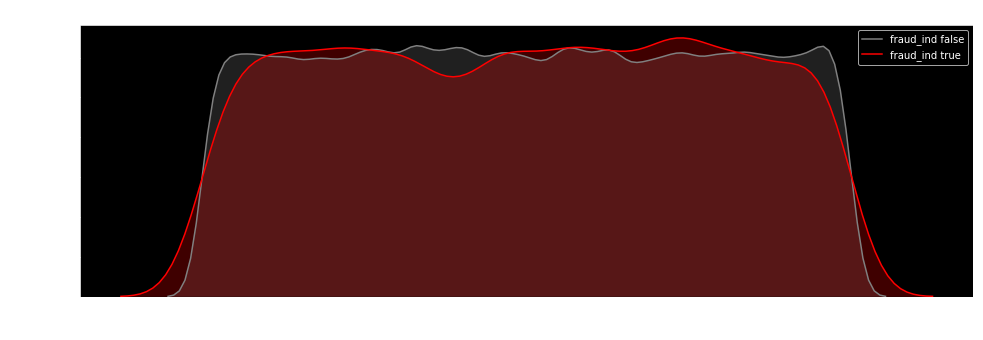

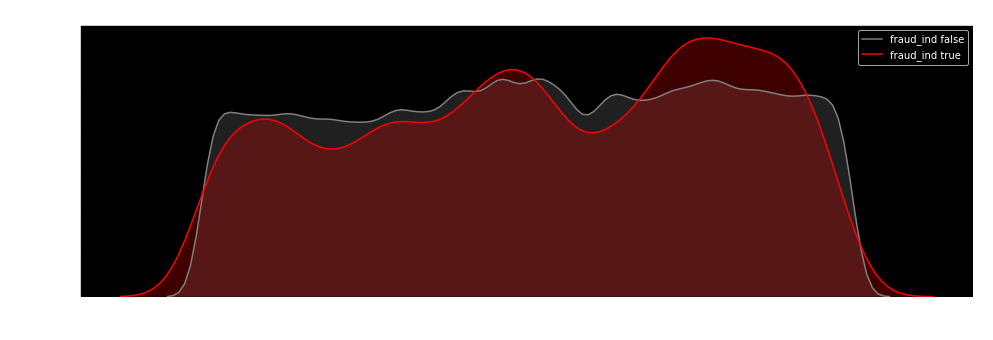

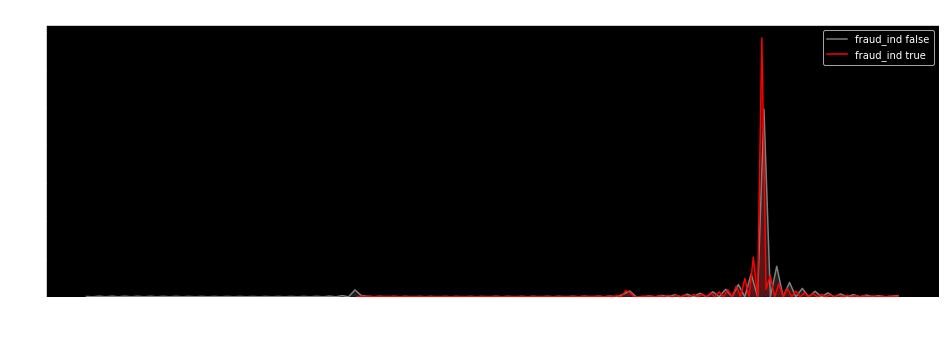

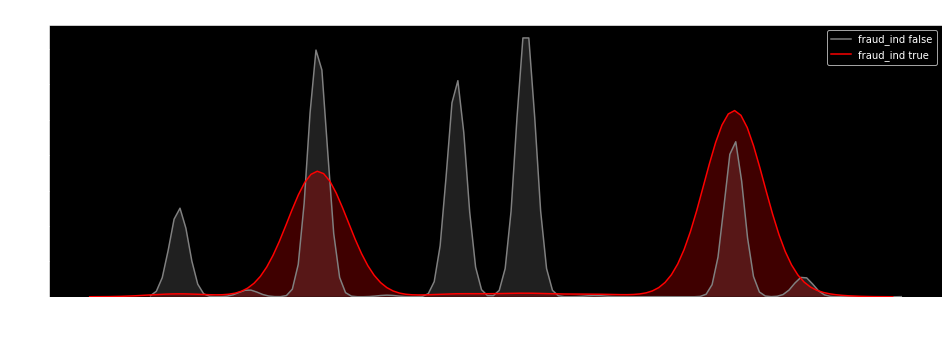

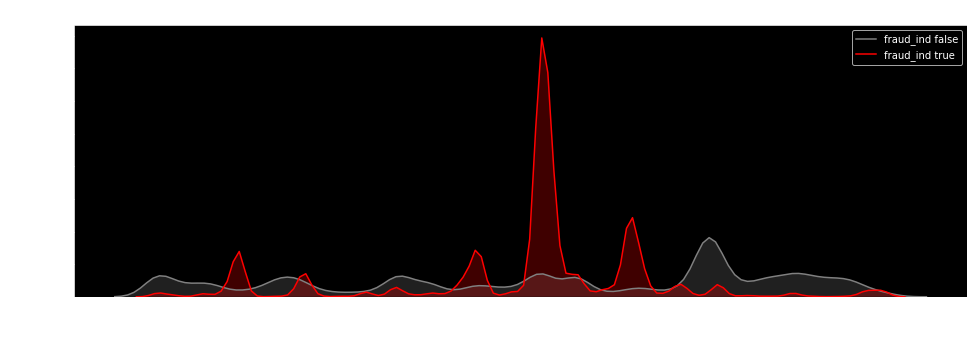

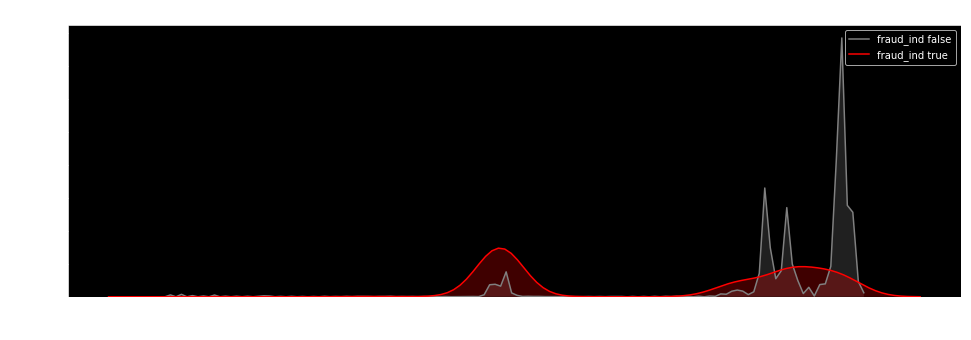

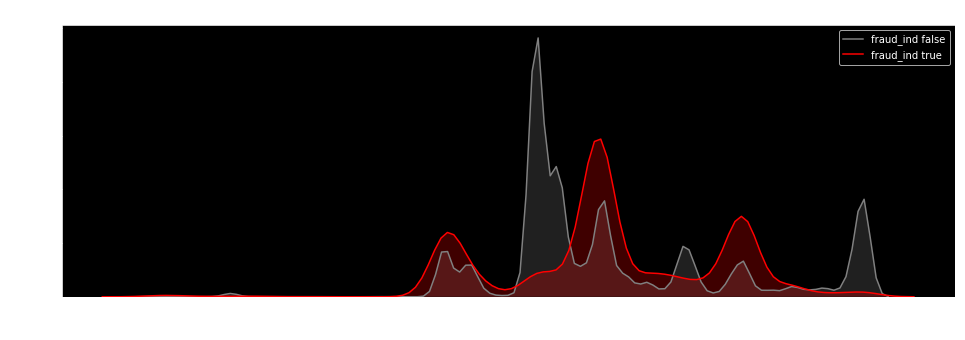

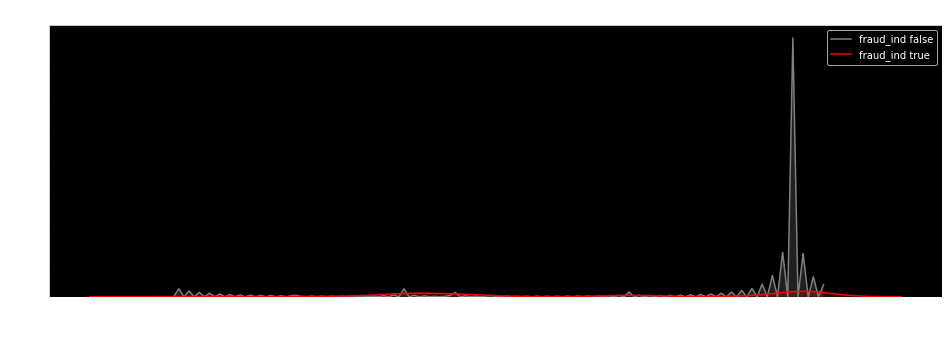

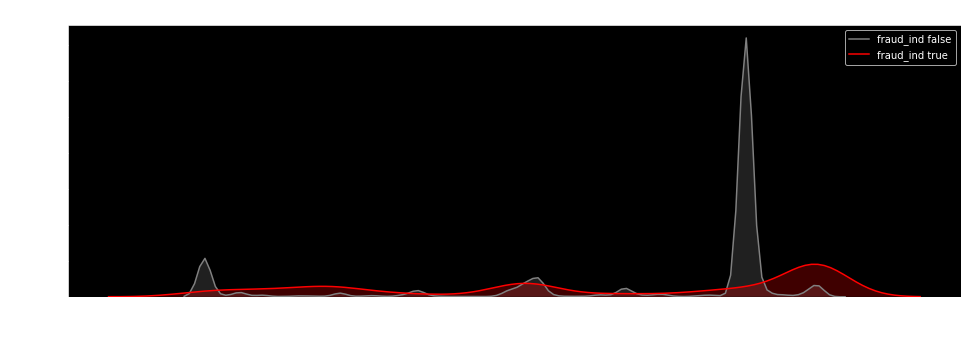

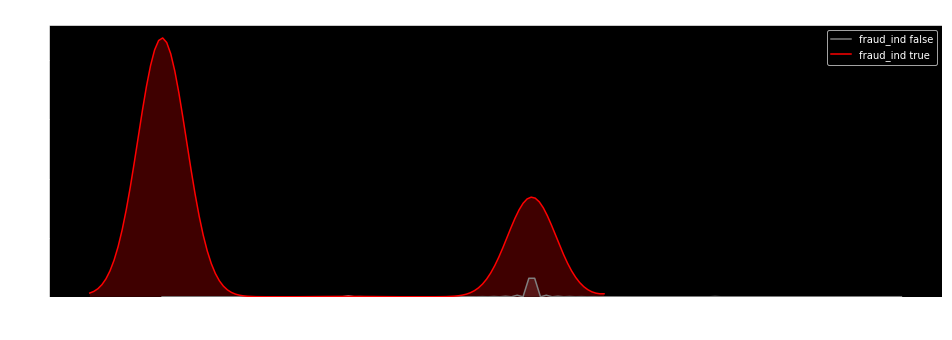

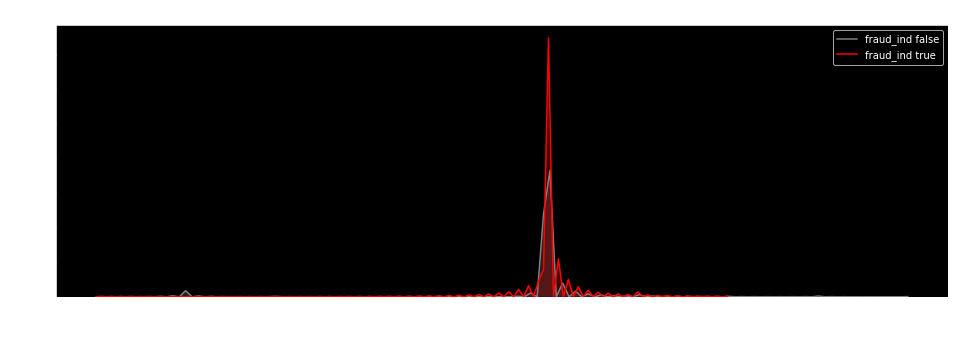

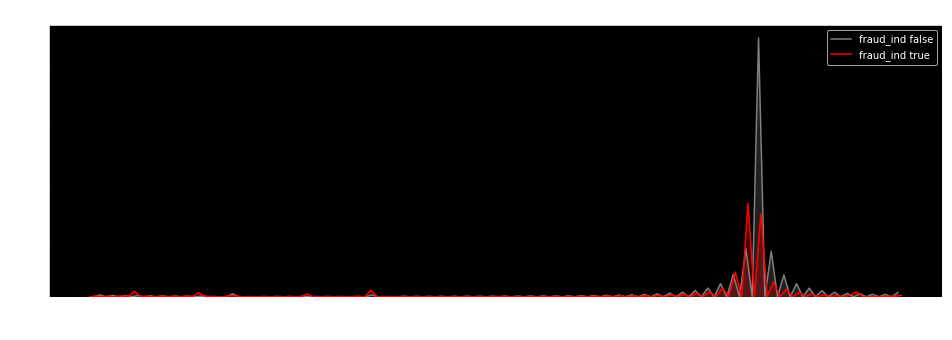

In [60]:
for row in classRow:
    showKdeplot(row, target)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


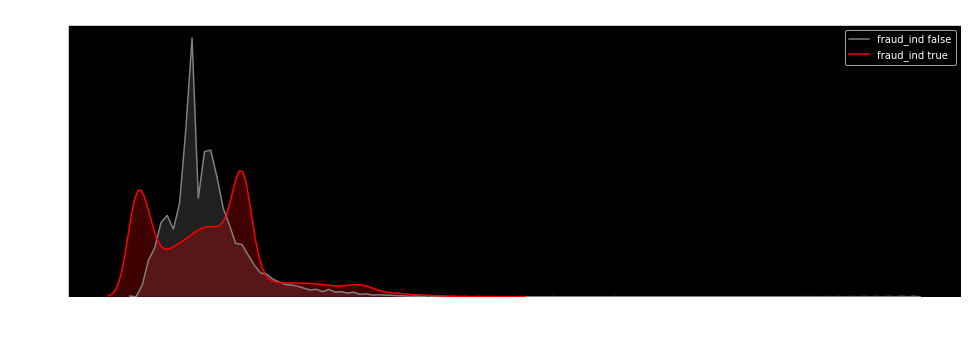

In [61]:
showKdeplot('conam', target)

# 剔除離群值

In [62]:
# df_train = df_train.drop(labels = df_train[df_train['LotArea'] > 80000].index,axis = 0)
# df_train = df_train.drop(labels = df_train[df_train['LotFrontage'] > 200].index,axis = 0)
# df_train = df_train.drop(labels = df_train[df_train['1stFlrSF'] > 3000].index,axis = 0)
# df_train = df_train.drop(labels = df_train[df_train['2ndFlrSF'] > 1700].index,axis = 0)

# 觀察數值

###  交易金額

(array([1.72500e+05, 3.04944e+05, 5.28372e+05, 2.74217e+05, 1.18642e+05,
        5.21290e+04, 2.90200e+04, 1.90130e+04, 1.16130e+04, 6.03800e+03,
        2.46700e+03, 1.40300e+03, 5.49000e+02, 3.17000e+02, 1.57000e+02,
        7.40000e+01, 1.02000e+02, 3.00000e+01, 7.90000e+01, 1.40000e+01,
        1.30000e+01, 2.20000e+01, 3.30000e+01, 2.00000e+00, 2.00000e+01,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 1.20000e+01, 2.00000e+00]),
 array([   0.        ,  240.29233333,  480.58466667,  720.877     ,
         961.16933333, 1201.46166667, 1441.754     , 1682.04633333,
        1922.33866667, 2162.631     , 2402.92333333, 2643.21566667,
        2883.508     , 3123.80033333, 3364.09266667, 3604.385     ,
        3844.67733333, 4084.96966667, 4325.262     , 4565.55433333,
        4805.84666667, 5046.139     , 5286.43133333, 5526.72366667,
        5767.016     , 6007.30833333, 6247.60066667, 6487.893     ,
        6728.18533333, 6968.47766667, 7208.77      ]),
 <a list of 30 Patch objects>

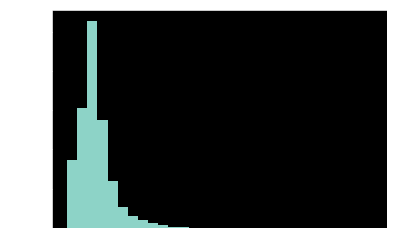

In [63]:
data = df_train[number[0]]
plt.hist(data, bins= 30)

### 分期期數

(array([1.479498e+06, 0.000000e+00, 0.000000e+00, 2.259000e+04,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.504500e+04,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 4.480000e+02,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 2.686000e+03,
        0.000000e+00, 0.000000e+00, 7.700000e+01, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.600000e+02, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 8.540000e+02, 0.000000e+00,
        0.000000e+00, 4.290000e+02]),
 array([0.        , 0.26666667, 0.53333333, 0.8       , 1.06666667,
        1.33333333, 1.6       , 1.86666667, 2.13333333, 2.4       ,
        2.66666667, 2.93333333, 3.2       , 3.46666667, 3.73333333,
        4.        , 4.26666667, 4.53333333, 4.8       , 5.06666667,
        5.33333333, 5.6       , 5.86666667, 6.13333333, 6.4       ,
        6.66666667, 6.93333333, 7.2       , 7.46666667, 7.73333333,
        8.        ]),
 <a list of 30 Patch objects>)

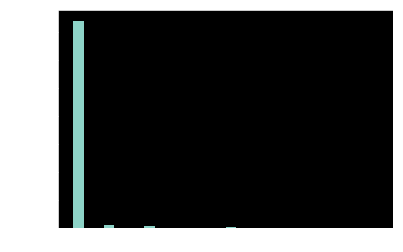

In [64]:
plt.hist(df_train[number[1]], bins= 30)

## 移除Null的feature
要移除部分不適合的feature
先將train和test的資料合併
刪除不需要的feature

In [65]:
df_all = pd.concat( [ df_train.drop(['txkey', 'locdt', 'fraud_ind'], axis = 1),
                    df_test.drop(['txkey', 'locdt'], axis = 1)],
                   axis = 0, ignore_index = False)
#確認合併後的資料大小
print("df_train = ",df_train.shape)
print("df_test = ",df_test.shape)
print("df_all = ",df_all.shape)

df_train =  (1521787, 23)
df_test =  (421665, 22)
df_all =  (1943452, 20)


# 調整分佈 取log exp

In [66]:
from scipy.stats import skew
print(df_all[number[0]].skew(axis = 0))
if df_all[number[0]].skew(axis = 0) > 0.75:
    df_all[number[0]] = np.log1p(df_all[number[0]])

1.6355366942103475


### 以數字顯示的類別特徵 改為字串顯示

In [67]:
#將 以數字顯示的類別特徵 改為字串顯示
yesAndNo = {'N' : 0, 'Y' : 1}
def mapYN(x):
    return 0
for i in classRow:
    df_all[i] = df_all[i].astype( str )
for i in flag:
    df_all[i] = df_all[i].apply( mapYN )
    df_all[i] = df_all[i].astype( bool )

### 處理時間

In [68]:
import math
def getSec(x):
    return x % 100
def getM(x):
    return ((x - getSec(x)) / 100) % 100
def getHr(x):
    return (x -  (getM(x) * 100 + getSec(x))) / 10000

def myCos(x):
    return math.cos(x * math.pi)
def getTime(x):
    sec = getSec(x)
    minute = getM(x)
    hr = getHr(x)
    time = (sec + (minute * 60) + (hr  * 60 * 60)) / (60 * 60 * 12)
    return myCos(time)
df_all['time'] = df_all[time].apply(getTime)

In [69]:
df_all.describe(include = "O")

,acqic,bacno,cano,contp,csmcu,etymd,hcefg,mcc,mchno,scity,stocn,stscd
count,1943452,1943452,1943452,1943452,1943452,1943452,1943452,1943452,1943452,1943452,1943452,1943452
unique,6866,163185,212458,7,76,11,10,460,102783,6647,109,5
top,6769,148859,71502,5,62,5,5,251,0,5817,102,0
freq,321217,1117,1117,1744501,1588534,513094,1802392,244585,63719,930790,1676085,1919206


In [70]:
df_all.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,insfg,iterm,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,time
0,6881,113261,38038,6.243778,5,0,False,0,False,False,...,False,0,172652.0,457,59333,False,0,102,0,-0.144068
1,0,134508,45725,6.145515,5,0,False,2,False,False,...,False,0,105114.0,451,0,False,5817,102,0,-0.955321
2,6881,15408,188328,6.243778,5,0,False,0,False,False,...,False,0,152458.0,457,59333,False,0,102,0,-0.626037
3,6716,157159,29967,6.924721,5,62,False,5,False,False,...,False,0,172946.0,247,50436,False,3281,102,0,-0.131536
4,5975,105985,81305,6.571807,5,62,False,4,False,False,...,False,0,182129.0,263,93775,False,5817,102,0,0.093602


In [71]:
def thehold(x):
    if x < 100:
        return -1
    else: 
        return x

df_temp = df_all[["scity", "time"]].groupby("scity").count().reset_index()
df_temp.columns = ["scity", "scity_count"]
df_temp['scity_count'] = df_temp['scity_count'].apply(thehold) 
#df_all = df_all.merge(df_temp, how="left", on="mcc")
df_temp.sort_values(['scity_count'])
count = 0
cc = 0
df_temp
for i in df_temp['scity_count']:
    if i < 100:
        count += 1
    else:
        cc += 1
print(count)
print(cc)
df_all = df_all.merge(df_temp, how="left", on="scity")
df_all.head(100)
df_all['scity_count'] = df_all['scity_count'].astype( str )

6396
251


### 將bacno cano做group_by

In [72]:
df_temp = df_all[["bacno", "time"]].groupby("bacno").count().reset_index()
df_temp.columns = ["bacno", "bacno_count"]
df_all = df_all.merge(df_temp, how="left", on="bacno")

df_temp2 = df_all[["cano", "time"]].groupby("cano").count().reset_index()
df_temp2.columns = ["cano", "cano_count"]
df_all = df_all.merge(df_temp2, how="left", on="cano")

df_all.head(10)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,mcc,mchno,ovrlt,scity,stocn,stscd,time,scity_count,bacno_count,cano_count
0,6881,113261,38038,6.243778,5,0,False,0,False,False,...,457,59333,False,0,102,0,-0.144068,182576,80,80
1,0,134508,45725,6.145515,5,0,False,2,False,False,...,451,0,False,5817,102,0,-0.955321,930790,23,23
2,6881,15408,188328,6.243778,5,0,False,0,False,False,...,457,59333,False,0,102,0,-0.626037,182576,18,18
3,6716,157159,29967,6.924721,5,62,False,5,False,False,...,247,50436,False,3281,102,0,-0.131536,16960,74,57
4,5975,105985,81305,6.571807,5,62,False,4,False,False,...,263,93775,False,5817,102,0,0.093602,930790,78,63
5,0,78377,2295,6.145515,5,0,False,2,False,False,...,451,0,False,5817,102,0,-0.952794,930790,28,28
6,6411,94435,49219,7.499694,3,62,False,4,False,False,...,339,0,False,5865,102,0,-0.146083,127,3,3
7,6769,112032,177989,6.268869,6,62,False,2,False,False,...,373,79200,False,5817,102,0,0.538955,930790,84,84
8,6092,92294,85535,5.310197,2,62,False,2,False,False,...,264,8335,False,3585,102,0,-0.203072,149,6,6
9,0,16279,110755,6.145515,5,0,False,2,False,False,...,451,0,False,5817,102,0,-0.946626,930790,6,4


### 先移除部分欄位

In [73]:
df_all = df_all.drop(['acqic', 'bacno', 'cano', 'mchno', 'scity', 'loctm', 'iterm'], axis = 1)
df_all.describe()

,conam,time,bacno_count,cano_count
count,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06
mean,6.125300e+00,-2.213015e-01,3.917922e+01,3.007329e+01
std,1.323899e+00,6.839189e-01,6.193016e+01,5.602825e+01
min,0.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00
25%,6.066201e+00,-8.726381e-01,1.100000e+01,9.000000e+00
50%,6.379699e+00,-4.187258e-01,2.400000e+01,1.800000e+01
75%,6.689027e+00,4.214975e-01,4.700000e+01,3.500000e+01
max,8.883192e+00,1.000000e+00,1.117000e+03,1.117000e+03


In [74]:
df_all.head(100)

,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,mcc,ovrlt,stocn,stscd,time,scity_count,bacno_count,cano_count
0,6.243778,5,0,False,0,False,False,5,False,457,False,102,0,-0.144068,182576,80,80
1,6.145515,5,0,False,2,False,False,0,False,451,False,102,0,-0.955321,930790,23,23
2,6.243778,5,0,False,0,False,False,5,False,457,False,102,0,-0.626037,182576,18,18
3,6.924721,5,62,False,5,False,False,5,False,247,False,102,0,-0.131536,16960,74,57
4,6.571807,5,62,False,4,False,False,5,False,263,False,102,0,0.093602,930790,78,63
5,6.145515,5,0,False,2,False,False,0,False,451,False,102,0,-0.952794,930790,28,28
6,7.499694,3,62,False,4,False,False,5,False,339,False,102,0,-0.146083,127,3,3
7,6.268869,6,62,False,2,False,False,5,False,373,False,102,0,0.538955,930790,84,84
8,5.310197,2,62,False,2,False,False,5,False,264,False,102,0,-0.203072,149,6,6
9,6.145515,5,0,False,2,False,False,0,False,451,False,102,0,-0.946626,930790,6,4


## One-Hot Encoding
要訓練非數值的feature 需要做One-Hot Encoding

In [75]:
df_all_dum = pd.get_dummies(df_all)
df_all_dum.head()

,conam,ecfg,flbmk,flg_3dsmk,insfg,ovrlt,time,bacno_count,cano_count,contp_0,...,scity_count_815,scity_count_829,scity_count_849,scity_count_8503,scity_count_8604,scity_count_869,scity_count_892,scity_count_928,scity_count_930790,scity_count_9501
0,6.243778,False,False,False,False,False,-0.144068,80,80,0,...,0,0,0,0,0,0,0,0,0,0
1,6.145515,False,False,False,False,False,-0.955321,23,23,0,...,0,0,0,0,0,0,0,0,1,0
2,6.243778,False,False,False,False,False,-0.626037,18,18,0,...,0,0,0,0,0,0,0,0,0,0
3,6.924721,False,False,False,False,False,-0.131536,74,57,0,...,0,0,0,0,0,0,0,0,0,0
4,6.571807,False,False,False,False,False,0.093602,78,63,0,...,0,0,0,0,0,0,0,0,1,0


## Standardization
正規化 將數值轉為[0,1] or [-1,1] <br>
只對數值類型的做

In [76]:
from sklearn import preprocessing

df_all_dum[ number[0] ] = preprocessing.scale( df_all_dum[ number[0] ] )
df_all_dum[ number[0] ].head()

df_all_dum[ 'bacno_count' ] = preprocessing.scale( df_all_dum[ 'bacno_count'] )
df_all_dum[ 'bacno_count' ].head()


df_all_dum[ 'cano_count' ] = preprocessing.scale( df_all_dum[ 'cano_count'] )
df_all_dum[ 'cano_count' ].head()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


0    0.891099
1   -0.126245
2   -0.215486
3    0.480592
4    0.587681
Name: cano_count, dtype: float64

## Training 開始


### 資料分割

In [111]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

print("df_all_dum = ", df_all_dum.shape)
print("df_train = ",df_train.shape)

#將train的部分取出(因為前面有先將train和test的資料和並)
X = df_all_dum[:df_train.shape[0]]
y = df_train[target]
print("X = ",X.shape)

#切分為trainData和ValData
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 77, stratify=y)

#將後半剩下的test資料取出
X_test =df_all_dum[ df_train.shape[0] : ]
print("X_test = ",X_test.shape)


df_all_dum =  (1943452, 901)
df_train =  (1521787, 23)
X =  (1521787, 901)
X_test =  (421665, 901)


### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(verbose = 1)
clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.0min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [79]:
from sklearn.metrics import f1_score

threshold_RF = 0.4

y_pred_proba_RF = clf.predict_proba(X_val)
y_pred_RF = (y_pred_proba_RF [:,1] >= threshold_RF).astype('int')

f1_score(y_pred_RF, y_val)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished


0.7522343594836146

In [80]:
df_error, df_miss = errorCount(y_pred_RF, y_val)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Series.data is deprecated and will be removed in a future version
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.data is deprecated and will be removed in a future version
  import sys


error count : 477
miss count : 521


In [34]:
def errorCount(y_pred, y_val):
    errorList = []
    missList = []
    for i in range(y_val.shape[0]):
        if y_val.data[i] != y_pred.data[i] and y_pred.data[i] == 1:
            errorList.append(X_val.index[i])
        if y_val.data[i] != y_pred.data[i] and y_pred.data[i] == 0:
            missList.append(X_val.index[i])
    print('error count : ' + str(len(errorList)))
    print('miss count : ' + str(len(missList)))
    df_error = pd.DataFrame(X_val, index=errorList)
    df_miss = pd.DataFrame(X_val, index=missList)
    return df_error, df_miss

In [72]:
y_test_proba = clf.predict_proba(X_test)
y_ans_pred = (y_test_proba [:,1] >= threshold).astype('int')


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished


NameError: name 'threshold' is not defined

In [85]:
pd.DataFrame({'fraud_ind': y_ans_pred}, index=df_test.txkey).to_csv('submissionRF.csv')

### lightGBM

In [81]:
import lightgbm as lgb
pos_weight = 5
lgbm = lgb.LGBMClassifier(objective = 'binary', scale_pos_weight=pos_weight)
lgbm.fit(X,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective='binary',
        random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        scale_pos_weight=5, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [82]:
threshold_GBM = 0.65

y_pred_proba_GBM = lgbm.predict_proba(X_val)
y_pred_GBM = (y_pred_proba_GBM [:,1] >= threshold_GBM).astype('int')
df_error, df_miss = errorCount(y_pred_GBM, y_val)
print("f1 = " + str(f1_score(y_val, y_pred_GBM)))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Series.data is deprecated and will be removed in a future version
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.data is deprecated and will be removed in a future version
  import sys


error count : 911
miss count : 824
f1 = 0.5828324116374127


In [77]:
y_pred_proba_GBM_test = lgbm.predict_proba(X_test)
y_ans_pred_GBM = (y_pred_proba_GBM_test [:,1] >= threshold_GBM).astype('int')

In [78]:
pd.DataFrame({'fraud_ind': y_ans_pred_GBM}, index=df_test.txkey).to_csv('submissionGBM.csv')

### XGBoost

In [91]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

print("df_all_dum = ", df_all.shape)
print("df_train = ",df_train.shape)
df_XGB = df_all
toint = ['contp', 'csmcu', 'etymd', 'hcefg', 'mcc', 'stocn', 'stscd', 'scity_count']
for i in toint:
    df_XGB[i] = df_XGB[i].astype( int )

#將train的部分取出(因為前面有先將train和test的資料和並)
X_XGB = df_XGB[:df_train.shape[0]]
y_XGB = df_train[target]
print("X = ",X_XGB.shape)

#切分為trainData和ValData
X_train_XGB, X_val_XGB, y_train_XGB, y_val_XGB = train_test_split(X_XGB, y_XGB, test_size = 0.1, random_state = 77, stratify=y_XGB)

#將後半剩下的test資料取出
X_test_XGB =df_XGB[ df_train.shape[0] : ]
print("X_test_XGB = ",X_test_XGB.shape)


df_all_dum =  (1943452, 17)
df_train =  (1521787, 23)
X =  (1521787, 17)
X_test_XGB =  (421665, 17)


In [92]:
def xgb_f1(y,t):
    t = t.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y] # binaryzing your output
    return 'f1',f1_score(t,y_bin)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

pos_weight = 4
model_XGB = XGBClassifier(scale_pos_weight=pos_weight,num_rounds=10)
model_XGB.fit(X, y, eval_metric=xgb_f1, verbose = 1)

In [96]:
threshold_XGB = 0.53

y_pred_proba_XGB = model_XGB.predict_proba(X_val)
y_pred_XGB = (y_pred_proba_XGB [:,1] >= threshold_XGB).astype('int')
df_error, df_miss = errorCount(y_pred_XGB, y_val)
print("f1 = " + str(f1_score(y_val, y_pred_XGB)))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Series.data is deprecated and will be removed in a future version
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.data is deprecated and will be removed in a future version
  import sys


error count : 978
miss count : 914
f1 = 0.5425531914893618


### Ensemble(RF,LightGBM,XGB)

In [105]:
threshold_Ensemble = 0.435
num_models = 4
y_test_pred_prob = 0

y_test_pred_prob += y_pred_proba_RF
y_test_pred_prob += y_pred_proba_RF
y_test_pred_prob += y_pred_proba_XGB
y_test_pred_prob += y_pred_proba_GBM


y_test_pred_prob /= num_models
y_pred_Ensemble = (y_test_pred_prob [:,1] >= threshold_Ensemble).astype('int')

df_error, df_miss = errorCount(y_pred_Ensemble, y_val)
print("f1 = " + str(f1_score(y_val, y_pred_Ensemble)))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Series.data is deprecated and will be removed in a future version
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.data is deprecated and will be removed in a future version
  import sys


error count : 565
miss count : 565
f1 = 0.7224950884086443


In [117]:
threshold_Ensemble = 0.435
num_models = 3

y_test_pred_prob_test = 0
y_pred_proba_RF_test = clf.predict_proba(X_test)
y_pred_proba_GBM_test = lgbm.predict_proba(X_test)
#y_pred_proba_XGB_test = model_XGB.predict_proba(X_test_XGB)


y_test_pred_prob_test += y_pred_proba_RF_test
y_test_pred_prob_test += y_pred_proba_RF_test
#y_test_pred_prob_test += y_pred_proba_XGB_test
y_test_pred_prob_test += y_pred_proba_GBM_test


y_test_pred_prob_test /= num_models
y_pred_Ensemble_test = (y_test_pred_prob_test [:,1] >= threshold_Ensemble).astype('int')


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished


In [118]:
pd.DataFrame({'fraud_ind': y_pred_Ensemble_test}, index=df_test.txkey).to_csv('submission_EnsembleAllTrainRFBGM.csv')

### 已全部資料train

In [112]:
clf.fit(X, y)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.9min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [113]:
lgbm.fit(X,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective='binary',
        random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        scale_pos_weight=5, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [114]:
model_XGB.fit(X_XGB, y_XGB, eval_metric=xgb_f1, verbose = 1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, num_rounds=10, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=5,
       seed=None, silent=True, subsample=1)